<a href="https://colab.research.google.com/github/SNEHA007-LAB/SalesAnalysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #paths to file
import numpy as np # linear algebra import pandas as pd # data processing import warnings# warning filter
import pandas as pd


#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


In [ ]:

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle warnings.filterwarnings("always") warnings.filterwarnings("ignore") #path for the training set

tr_path = "/content/Train.csv" #path for the testing set
te_path = "/content/Test.csv"

##Pre-Processing and Data Analysi Training set:
tr_df = pd.read_csv(tr_path)
# explore the first 5 rows tr_df.head()

##Testing set:
te_df = pd.read_csv(te_path)
# explore the first 5 rows te_df.head()

print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

#column information tr_df.info(verbose=True, null_counts=True)

#summary statistics test te_df.describe(

#summary statistics train tr_df.describe()

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier

Text(0.5, 1.0, 'Item_Weight Boxplot')

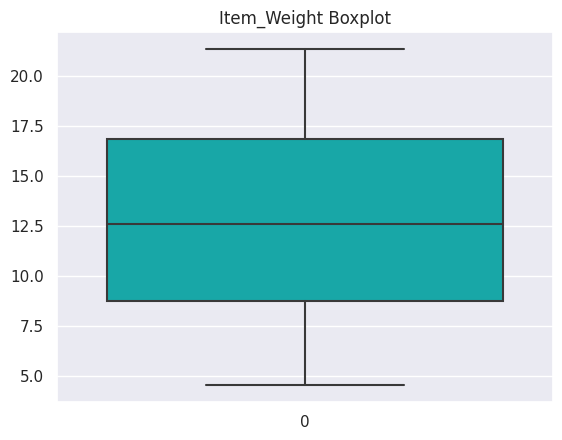

In [ ]:
#Missing value analysis:
#missing values in decsending order print("Train:\n")
print(tr_df.isnull().sum().sort_values(ascending=False),"\n\n",tr_df.isnull().sum()/tr_df.shape[0] *100,"\n\n")
print("Test:\n")
print(te_df.isnull().sum().sort_values(ascending=False),"\n\n",te_df.isnull().sum()/te_df.shape[0] *100,"\n\n")

print("Outlet_Size:\n", tr_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", tr_df.Item_Weight.value_counts(), "\n\n")

print("test mode, train mode\n",[tr_df['Outlet_Size'].mode().values[0], te_df['Outlet_Size'].mode().values[0]])

#train
tr_df['Outlet_Size'] = tr_df['Outlet_Size'].fillna( tr_df['Outlet_Size'].dropna().mode().values[0])

#test
te_df['Outlet_Size'] = te_df['Outlet_Size'].fillna( te_df['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values tr_df['Outlet_Size'].isnull().sum(),te_df['Outlet_Size'].isnull().sum()

sns.boxplot(data=tr_df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")


In [ ]:
#There are no outliers so we will fill the missing data with the mean value for maximum efficiency:
#train
tr_df['Item_Weight'] = tr_df['Item_Weight'].fillna( tr_df['Item_Weight'].dropna().mean())

#test
te_df['Item_Weight'] = te_df['Item_Weight'].fillna( te_df['Item_Weight'].dropna().mean())

#checking if we filled missing values tr_df['Item_Weight'].isnull().sum(),te_df['Item_Weight'].isnull().sum()


In [ ]:
#Now we can see using the .info() method we can see we have filled successfully all missing the missing data for both sets:
print("train:\n")
print(tr_df.info())
print("\n\ntest:\n")
print(te_df.info())

#Data Exploration:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list() #list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num = tr_df[num] #categoric df
BM_cat = tr_df[cat]

#print(num) #print(cat)

[tr_df[category].value_counts() for category in cat[1:]]


train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [ ]:
#We can See we have Repeating values with different names in the Item_Fat_Content column, we will correct them using the using the .replace() method:
#train
tr_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg','Low Fat','Low Fat','Regular'],inplace = True) #test
te_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg','Low Fat','Low Fat','Regular'],inplace = True)

#check result tr_df.Item_Fat_Content.value_counts()

tr_df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Low Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Low Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


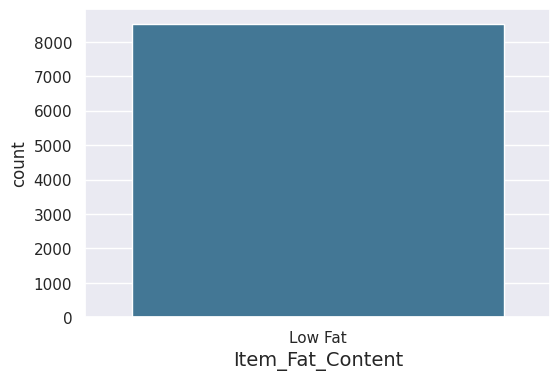

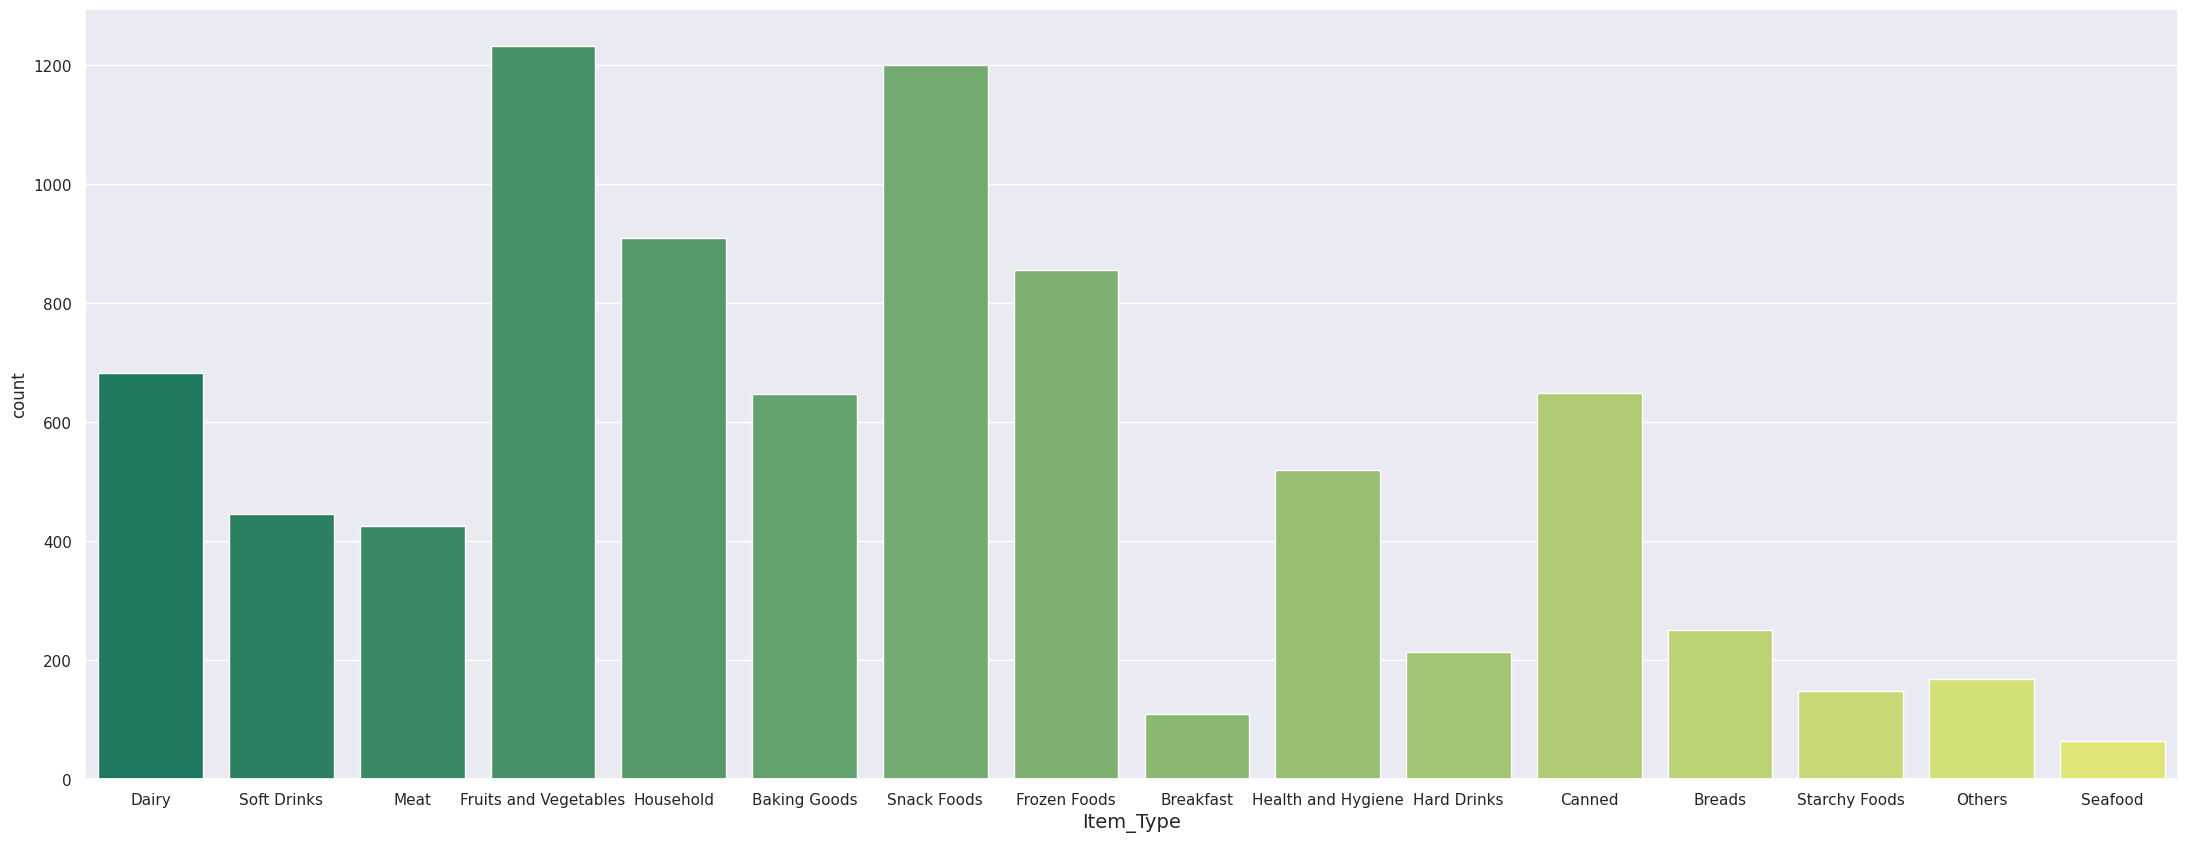

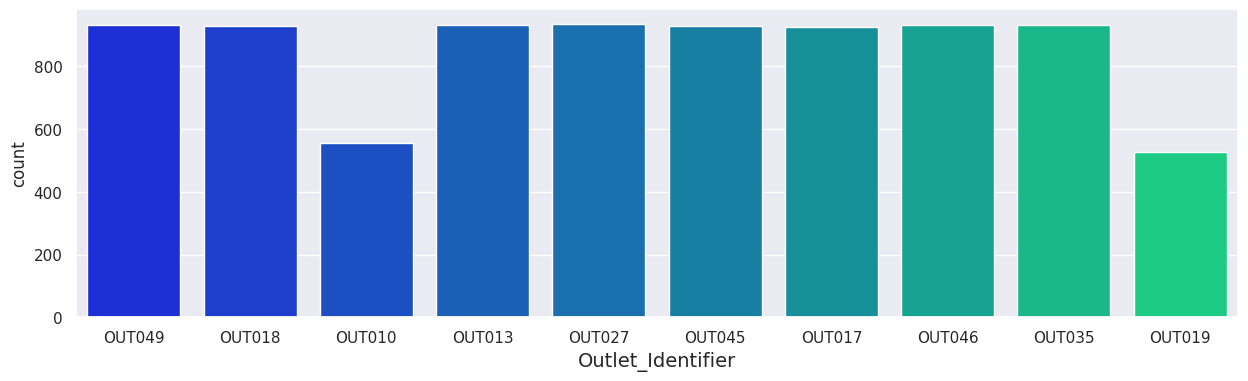

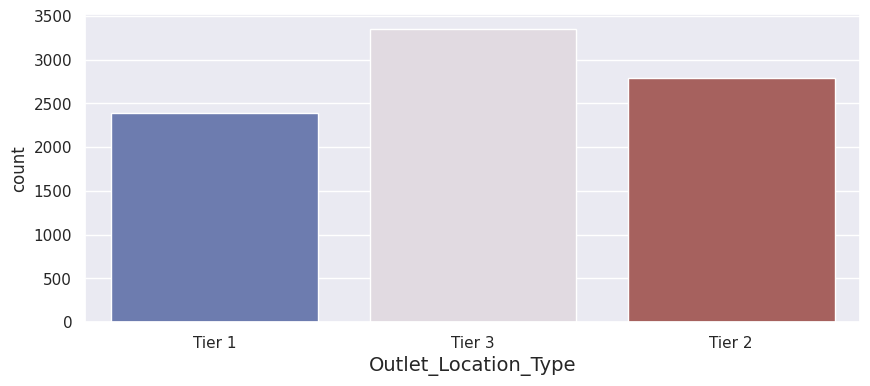

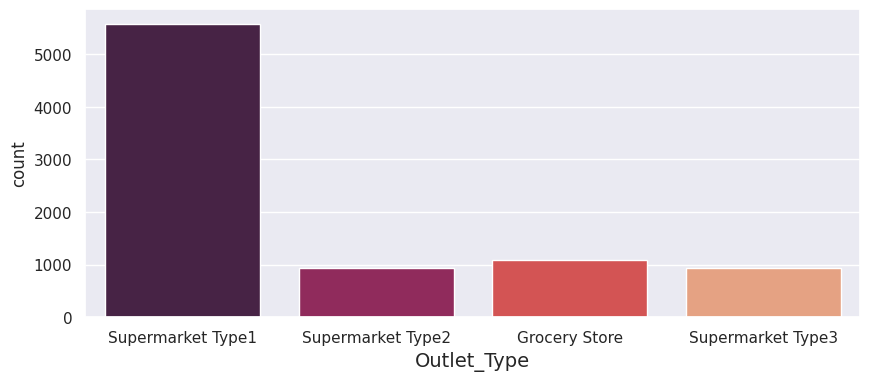

In [ ]:
#Outlet_Establishment_Year is quite useless as it is, making a new column with the age the new name will be Outlet_Age:
#creating our new column for both datasets tr_df['Outlet_Age'], te_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result #tr_df['Outlet_Age'].head #te_df['Outlet_Age'].head

#Data Visualization:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=tr_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=tr_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=tr_df,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=tr_df,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=tr_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()


In [ ]:
#Categorical and numerical realizations:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list() #numeric df
BM_num = tr_df[num]

plt.hist(tr_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use for numeric in BM_num[num[:3]]:
plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
plt.title(numeric)
plt.ylabel('Item_Outlet_Sales')
plt.show()


KeyError: ignored

In [ ]:
#Multivariate plots:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=tr_df,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=tr_df,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=tr_df,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=tr_df,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=tr_df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()


TypeError: ignored

<Figure size 2700x1000 with 0 Axes>

In [ ]:
#Correlation matrix:
#plotting the correlation matrix sns.heatmap(tr_df.corr() ,cmap='rocket')

Feature engineering:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

#lable encoding
le = LabelEncoder() Label =
['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
tr_df[i] = le.fit_transform(tr_df[i]) te_df[i] = le.fit_transform(te_df[i])
tr_df.head()

#one hot encoding
cols = ['Item_Type','Outlet_Type'] # Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int6 4')
te_oh = pd.DataFrame(OH_encoder.fit_transform(te_df[cols])).astype('int6 4')

#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols) te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back tr_oh.index = tr_df.index
te_oh.index = te_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
tr_fe = pd.concat([tr_df, tr_oh], axis=1) te_fe = pd.concat([te_df, te_oh], axis=1)


# Dropping irrelevant columns tr_fe =
tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establ ishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establ ishment_Year','Outlet_Type','Item_Type'],axis=1)


In [ ]:
Machine learning models:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

def cross_val(model_name,model,X,y,cv):

scores = CVS(model, X, y, cv=cv) print(f'{model_name} Scores:') for i in scores:
print(round(i,2)) print(f'Average {model_name} score:
{round(scores.mean(),4)}')


In [ ]:
#Linear regression:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")


NameError: ignored

In [ ]:
#Random Forest Regressor:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5,

min_samples_leaf=100,n_jobs=4,random_state=101) #fit
RFR.fit(X_train, y_train) #predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS = round(CVS(RFR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")

MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R2]
CVS= [LR_CS,RFR_CS,LS_CVS]

Models = pd.DataFrame({
'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)